<h1><b>Task 3 - Unsupervised Machine Learning</b></h1>

In [17]:
# Importing the required libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets
%matplotlib inline
from sklearn.cluster import KMeans

In [18]:
# Loading the dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head(8)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2


In [19]:
# Feature selection for training model
x = df.iloc[:, [0,1,2,3]].values

In [26]:
# KMeans with value = 4
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 3 1 3 1 3 1 3 3 3 3 1 3 1 3 3 1 3 1 3 1 1
 1 1 1 1 1 3 3 3 3 1 3 1 1 1 3 3 3 1 3 3 3 3 3 1 3 3 2 1 2 1 2 2 3 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 1 1 2 2 2 1 2 2 2 1 1
 2 1]


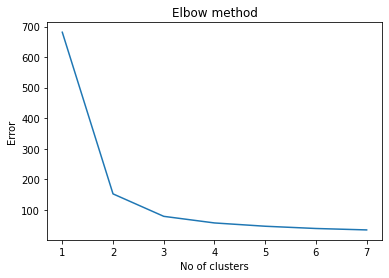

In [31]:
# Elbow method for finding optimum number of clusters
error = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    error.append(kmeans.inertia_)
plt.plot(range(1, 8), error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<b> As in the above graph the elbow is formed at k=3, so implementing kmeans with value=3 <b>

In [32]:
# KMeans with value = 3
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [52]:
# KMeans with value = 3
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(x)

In [53]:
# Silhouette method
from sklearn import metrics
labels = kmeans.labels_
metrics.silhouette_score(x, labels, metric = 'euclidean')

0.5528190123564091

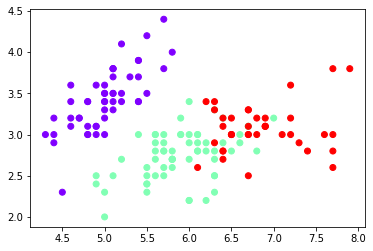

In [54]:
# Plotting the graph
plt.scatter(x[:,0],x[:,1],c=y_kmeans,cmap='rainbow')